In [87]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

In [11]:
data = pd.read_csv('data.csv')
data

,Close_ETF,oil,gold,JPM
0,97.349998,0.039242,0.004668,0.032258
1,97.750000,0.001953,-0.001366,-0.002948
2,99.160004,-0.031514,-0.007937,0.025724
3,99.650002,0.034552,0.014621,0.011819
4,99.260002,0.013619,-0.011419,0.000855
...,...,...,...,...
995,150.570007,0.009752,0.004634,0.003859
996,151.600006,-0.009341,-0.015325,0.018259
997,151.300003,0.036120,-0.006195,-0.007928
998,152.619995,0.001542,0.005778,-0.000381


# Part9

In [32]:
X = data[['oil','gold']]
y = data['Close_ETF']
reg = LinearRegression().fit(X, y)

In [37]:
print('The Intercept is',reg.intercept_)
print('The Coefficient is',reg.coef_)

The Intercept is 121.14272529623004
The Coefficient is [-9.12610011 29.62259192]


In [45]:
X = sm.add_constant(X)
Ols = sm.OLS(y, X).fit()
predictions = Ols.predict(X) 

In [47]:
print(Ols.summary())

                            OLS Regression Results                            
Dep. Variable:              Close_ETF   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3743
Date:                Mon, 30 Nov 2020   Prob (F-statistic):              0.688
Time:                        22:32:09   Log-Likelihood:                -3949.4
No. Observations:                1000   AIC:                             7905.
Df Residuals:                     997   BIC:                             7919.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        121.1427      0.399    303.856      0.0

## Part10

In [68]:
#Residuals of Oil
X1 = data[['Close_ETF','gold']]
y1 = data['oil']

In [69]:
X1 = sm.add_constant(X1)
Ols = sm.OLS(y1, X1).fit()
Oil_predictions = Ols.predict(X1)

In [70]:
Oil_res = []
for i in range(0,len(Oil_predictions)):
    Oil_res.append(y1[i] - Oil_predictions[i])
Oil_res = np.array(Oil_res)

In [72]:
#Residuals of Gold
X2 = data[['Close_ETF','oil']]
y2 = data['gold']

In [73]:
X2 = sm.add_constant(X2)
Ols = sm.OLS(y2, X2).fit()
Gold_predictions = Ols.predict(X2)

In [74]:
Gold_res = []
for i in range(0,len(Gold_predictions)):
    Gold_res.append(y2[i] - Gold_predictions[i])
Gold_res = np.array(Gold_res)

In [77]:
#Residuals of ETF
X3 = data[['gold','oil']]
y3 = data['Close_ETF']

In [78]:
X3 = sm.add_constant(X3)
model = sm.OLS(y3, X3).fit()
ETF_predictions = model.predict(X3)

In [79]:
ETF_res = []
for i in range(0,len(ETF_predictions)):
    ETF_res.append(y3[i] - ETF_predictions[i])
ETF_res = np.array(ETF_res)

### Mean 0

In [84]:
print(Oil_res.mean())
print(Gold_res.mean())
print(ETF_res.mean())

2.9254376698872876e-17
-1.9012569296705807e-18
-9.094947017729283e-16


From the results, we could know that mean of residuals of these three parameters are all close to 0. The Mean 0 assumption is satisfied.

### Normality Assumption(Normal Probability Plot & QQ Plot)

Text(0, 0.5, 'Ordered Values')

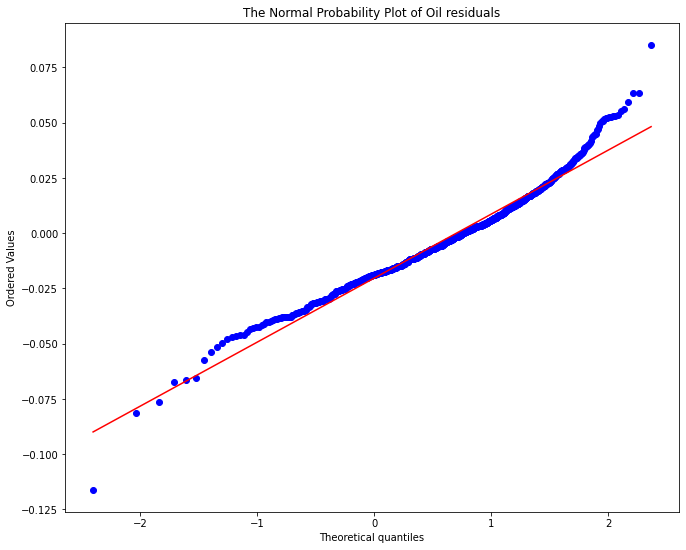

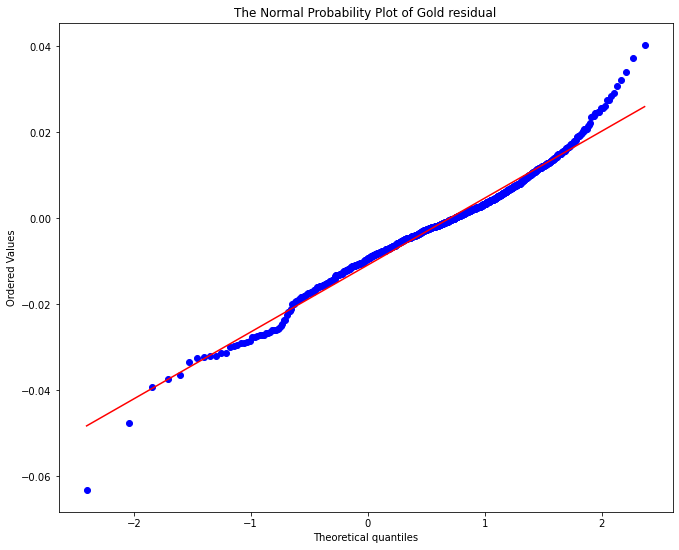

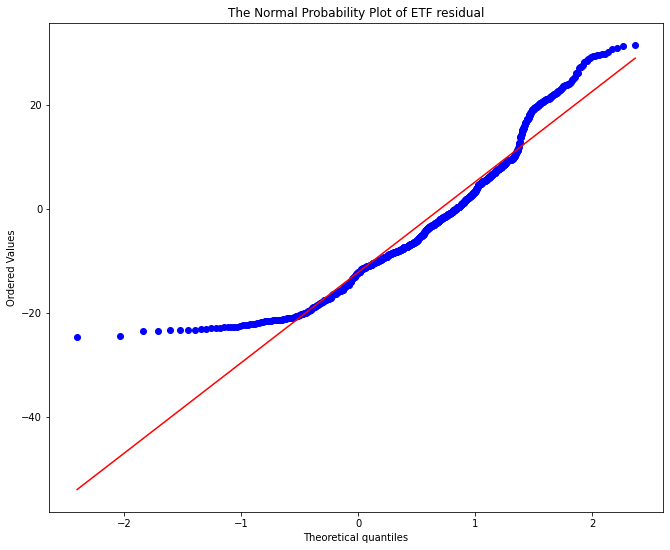

In [120]:
fig = plt.figure()
fig.set_size_inches(11, 9)
ax = fig.add_subplot(111)
res = stats.probplot(Oil_res, dist=stats.loggamma, sparams=(2.5,), plot=ax)
ax.set_title("The Normal Probability Plot of Oil residuals")
plt.xlabel('Theoretical quantiles')
plt.ylabel('Ordered Values')

fig = plt.figure()
fig.set_size_inches(11, 9)
ax = fig.add_subplot(111)
res = stats.probplot(Gold_res, dist=stats.loggamma, sparams=(2.5,), plot=ax)
ax.set_title("The Normal Probability Plot of Gold residual")
plt.xlabel('Theoretical quantiles')
plt.ylabel('Ordered Values')


fig = plt.figure()
fig.set_size_inches(11, 9)
ax = fig.add_subplot(111)
res = stats.probplot(ETF_res, dist=stats.loggamma, sparams=(2.5,), plot=ax)
ax.set_title("The Normal Probability Plot of ETF residual")
plt.xlabel('Theoretical quantiles')
plt.ylabel('Ordered Values')

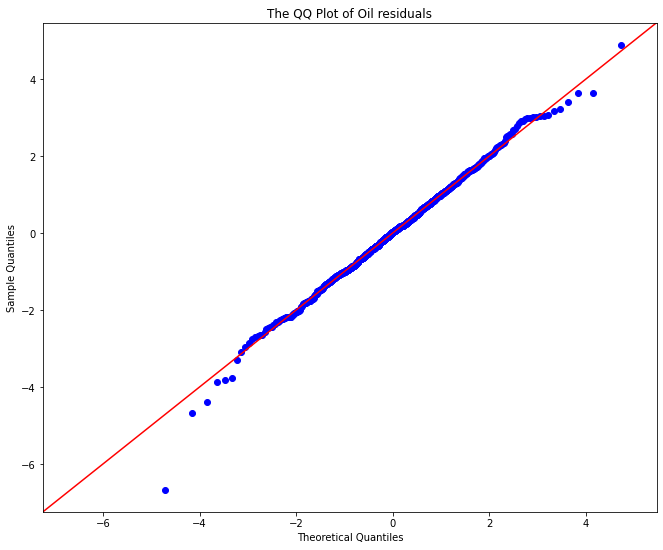

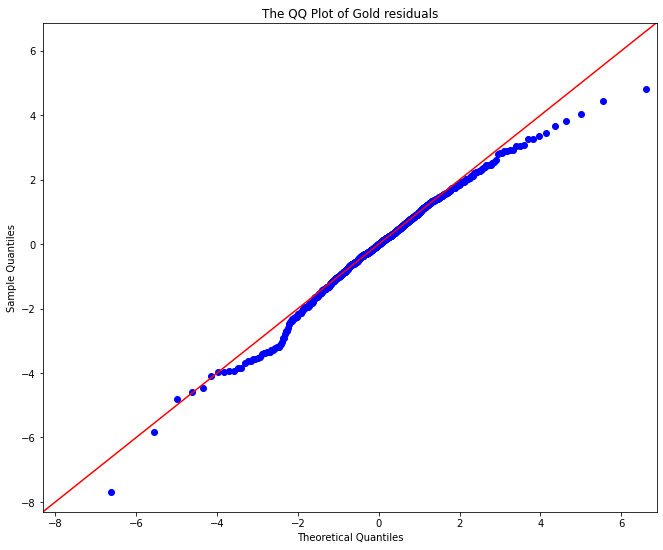

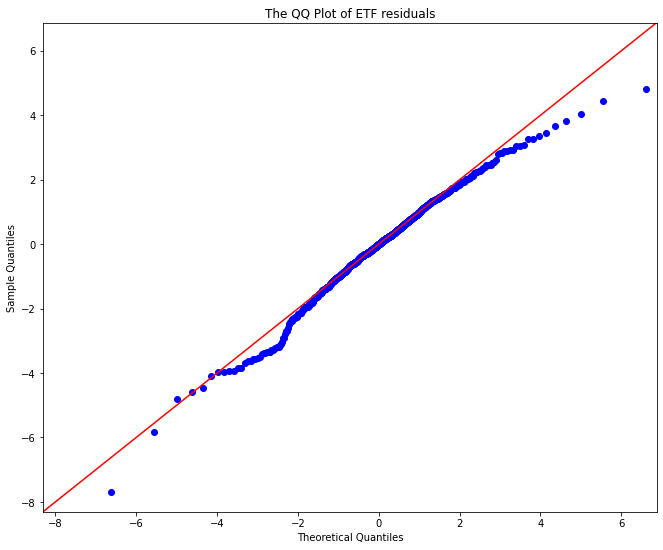

In [124]:
fig = sm.qqplot(Oil_res, stats.t, fit=True, line="45")
fig.set_size_inches(11, 9)
plt.title('The QQ Plot of Oil residuals')
plt.show()

fig = sm.qqplot(Gold_res, stats.t, fit=True, line="45")
fig.set_size_inches(11, 9)
plt.title('The QQ Plot of Gold residuals')
plt.show()

fig = sm.qqplot(Gold_res, stats.t, fit=True, line="45")
fig.set_size_inches(11, 9)
plt.title('The QQ Plot of ETF residuals')
plt.show()

### Independence Assumption and Constant Variance Assumption(Scatter plot)

Text(0, 0.5, 'Residuals')

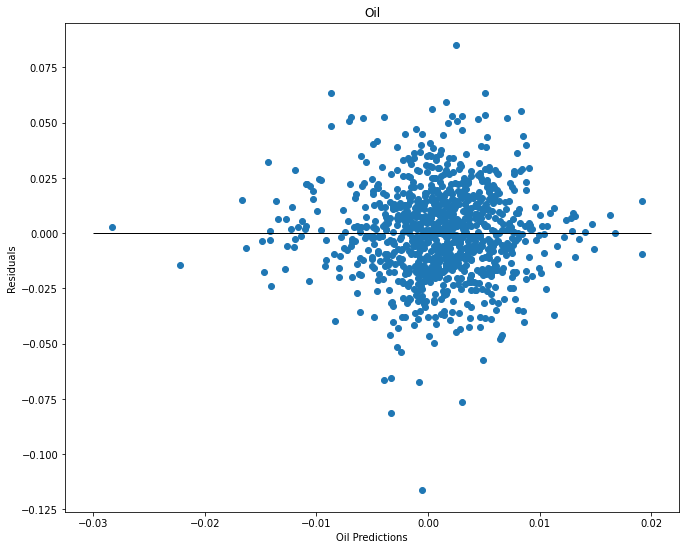

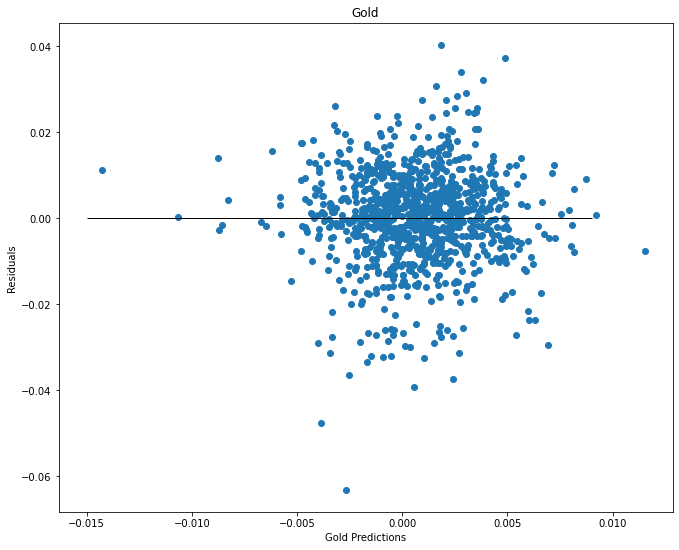

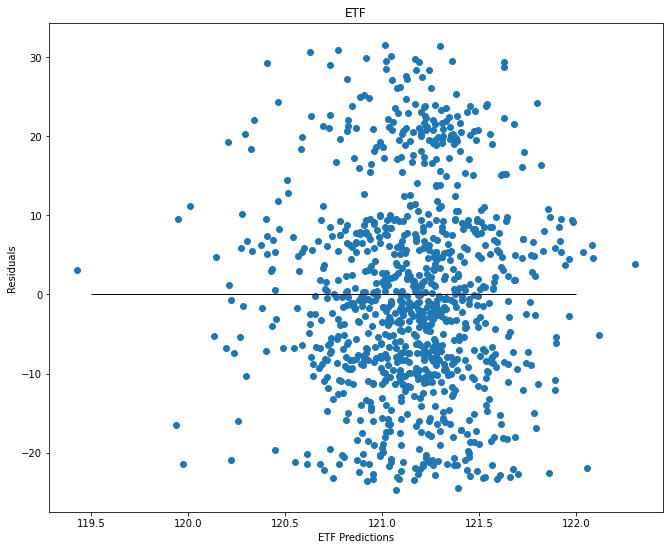

In [159]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 9)
plt.hlines(0,-0.03,0.02,colors = 'black',linewidth = 1)
plt.scatter(Oil_predictions,Oil_res)
plt.title('Oil')
plt.xlabel('Oil Predictions')
plt.ylabel('Residuals')

fig, ax = plt.subplots()
plt.hlines(0,-0.015,0.009,colors = 'black',linewidth = 1)
fig.set_size_inches(11, 9)
plt.scatter(Gold_predictions,Gold_res)
plt.title('Gold')
plt.xlabel('Gold Predictions')
plt.ylabel('Residuals')

fig, ax = plt.subplots()
plt.hlines(0,119.5,122,colors = 'black',linewidth = 1)
fig.set_size_inches(11, 9)
plt.scatter(ETF_predictions,ETF_res)
plt.title('ETF')
plt.xlabel('ETF Predictions')
plt.ylabel('Residuals')
